# 2023 Top Spotify Songs Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

In [2]:
file_path = 'spotify-2023.csv'

data = pd.read_csv(file_path, encoding='ISO-8859-1')


## 1. 전체 노래 취향 분석

In [3]:
def calculate_stats(column):
    """Calculate statistics"""
    count = len(column)
    mean = column.sum() / count
    std = ((column - mean) ** 2).sum() / count
    std = std ** 0.5
    min_val = column.min()
    max_val = column.max()
    return {
        'mean': round(mean,2),
        'std': round(std,2),
        'min': min_val,
        'max': max_val
    }

In [4]:
music_attributes = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

music_genre = {attr: calculate_stats(data[attr]) for attr in music_attributes}

In [5]:
music_genre

{'danceability_%': {'mean': 66.97, 'std': 14.62, 'min': 23, 'max': 96},
 'valence_%': {'mean': 51.43, 'std': 23.47, 'min': 4, 'max': 97},
 'energy_%': {'mean': 64.28, 'std': 16.54, 'min': 9, 'max': 97},
 'acousticness_%': {'mean': 27.06, 'std': 25.98, 'min': 0, 'max': 97},
 'instrumentalness_%': {'mean': 1.58, 'std': 8.41, 'min': 0, 'max': 91},
 'liveness_%': {'mean': 18.21, 'std': 13.7, 'min': 3, 'max': 97},
 'speechiness_%': {'mean': 10.13, 'std': 9.91, 'min': 2, 'max': 64}}

### 1-1. 장르분석

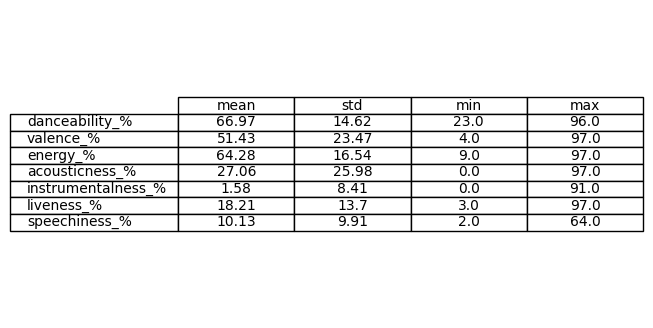

In [6]:

# Creating a DataFrame from the provided dictionary
music_genre_df = pd.DataFrame(music_genre).T

# Plotting the data as a table
fig, ax = plt.subplots(figsize=(6, 4))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=music_genre_df.values, colLabels=music_genre_df.columns, rowLabels=music_genre_df.index, cellLoc = 'center', loc='center')

plt.show()

### 1-2. 출시시기 분석

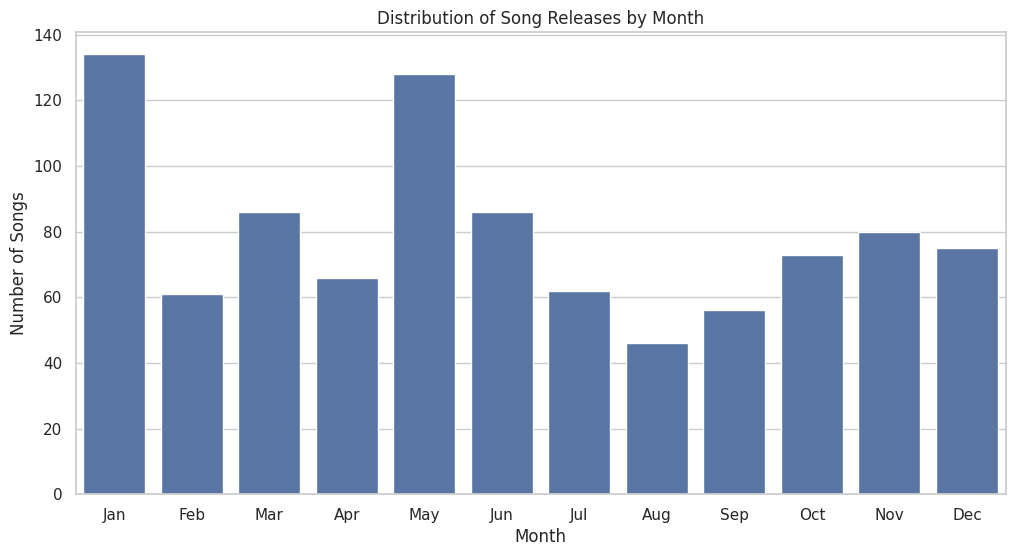

In [7]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting the distribution of 'released_month'
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='released_month')
plt.title('Distribution of Song Releases by Month')
plt.xlabel('Month')
plt.ylabel('Number of Songs')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

### 1-2. 곡 mode 분석

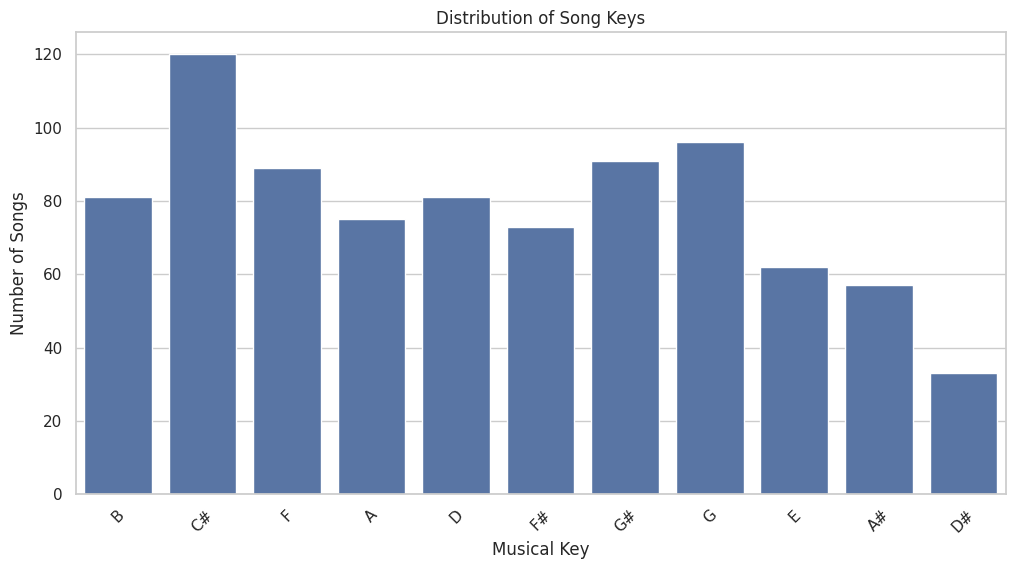

In [8]:
# Plotting the distribution of 'key'
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='key')
plt.title('Distribution of Song Keys')
plt.xlabel('Musical Key')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.show()

## 2. 많이 들은 노래(Top 100) 분석

In [9]:
# Sorting the top 100 songs based on the streams value
top100 = data.sort_values(by='streams', ascending=False).head(100)

top100_music_genre = {attr: calculate_stats(top100[attr]) for attr in music_attributes}

In [10]:
top100_music_genre

{'danceability_%': {'mean': 65.73, 'std': 14.57, 'min': 33, 'max': 92},
 'valence_%': {'mean': 47.89, 'std': 23.04, 'min': 6, 'max': 96},
 'energy_%': {'mean': 64.86, 'std': 16.52, 'min': 20, 'max': 94},
 'acousticness_%': {'mean': 27.63, 'std': 27.11, 'min': 0, 'max': 91},
 'instrumentalness_%': {'mean': 2.19, 'std': 9.42, 'min': 0, 'max': 63},
 'liveness_%': {'mean': 19.64, 'std': 13.44, 'min': 5, 'max': 72},
 'speechiness_%': {'mean': 10.11, 'std': 9.92, 'min': 3, 'max': 46}}

### 2-1. (전체 vs 인기곡) 장르 비교

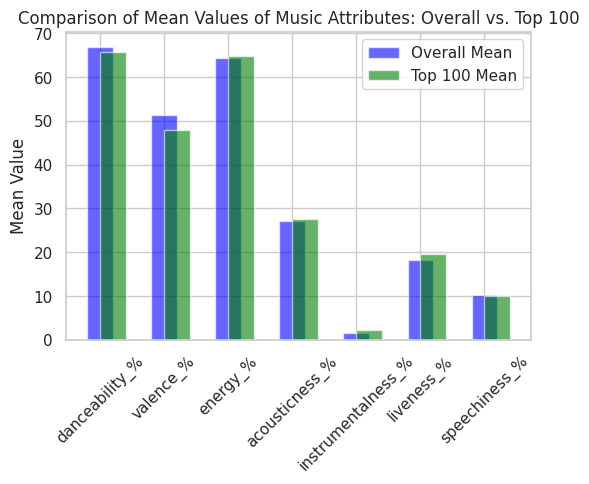

In [11]:
# Preparing data for the graph
attributes = list(music_genre.keys())
means_overall = [music_genre[attr]['mean'] for attr in attributes]
means_top100 = [top100_music_genre[attr]['mean'] for attr in attributes]

# Creating the comparison graph
plt.figure(figsize=(6, 4))
x = range(len(attributes))
plt.bar(x, means_overall, width=0.4, label='Overall Mean', align='center', color='blue', alpha=0.6)
plt.bar(x, means_top100, width=0.4, label='Top 100 Mean', align='edge', color='green', alpha=0.6)

# Adding labels and title
plt.xticks(x, attributes, rotation=45)
plt.ylabel('Mean Value')
plt.title('Comparison of Mean Values of Music Attributes: Overall vs. Top 100')
plt.legend()
plt.show()

### 2-2. (전체 vs 인기곡) 출시시기 비교

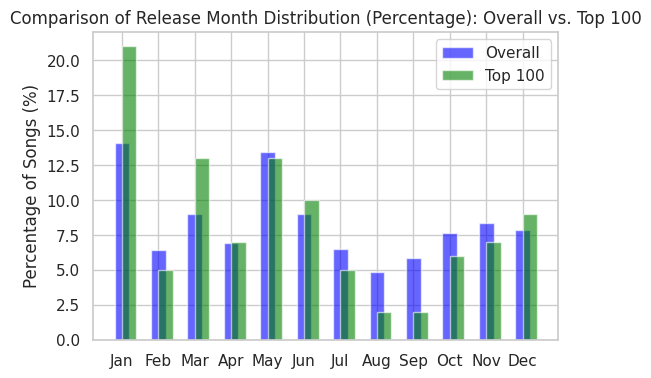

In [12]:
# Preparing the percentage data
overall_month_percentage = (data['released_month'].value_counts(normalize=True).sort_index()) * 100
top100_month_percentage = (top100['released_month'].value_counts(normalize=True).sort_index()) * 100

# Creating the comparison graph
plt.figure(figsize=(6, 4))
x = range(1, 13)  # Months from 1 to 12
plt.bar(x, overall_month_percentage, width=0.4, label='Overall', align='center', color='blue', alpha=0.6)
plt.bar(x, top100_month_percentage, width=0.4, label='Top 100', align='edge', color='green', alpha=0.6)

# Adding labels and title
plt.xticks(x, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Percentage of Songs (%)')
plt.title('Comparison of Release Month Distribution (Percentage): Overall vs. Top 100')
plt.legend()
plt.show()

### 2-3. (전체 vs 인기곡) 곡 mode 비교

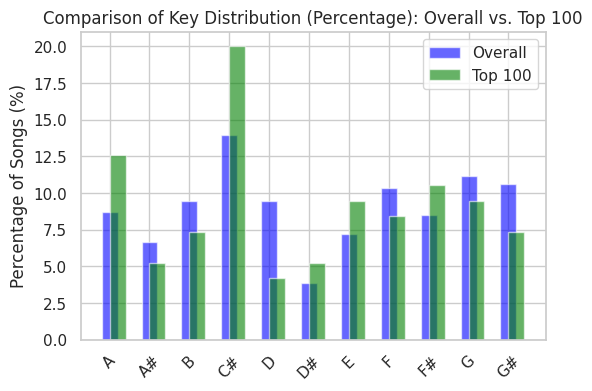

In [13]:
# Calculating the percentage distribution of musical keys for both overall dataset and top 100 streamed songs

# Preparing the percentage data for keys
overall_key_percentage = (data['key'].value_counts(normalize=True).sort_index()) * 100
top100_key_percentage = (top100['key'].value_counts(normalize=True).sort_index()) * 100

# Creating the comparison graph
plt.figure(figsize=(6, 4))
x = overall_key_percentage.index
plt.bar(x, overall_key_percentage, width=0.4, label='Overall', align='center', color='blue', alpha=0.6)
plt.bar(x, top100_key_percentage, width=0.4, label='Top 100', align='edge', color='green', alpha=0.6)

# Adding labels and title
plt.xticks(x, rotation=45)
plt.ylabel('Percentage of Songs (%)')
plt.title('Comparison of Key Distribution (Percentage): Overall vs. Top 100')
plt.legend()
plt.show()

